# Auth And Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import random
import seaborn as sns


In [ ]:
from google.cloud import bigquery
from google.cloud import bigquery_storage
from google.oauth2 import service_account

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.colab import files

# Simplest ModelThat we cant Implent in Metter of Second

In [ ]:
import pandas as pd

project_id = '789456123'
Job_applicant_count = pd.io.gbq.read_gbq(f'''
SELECT
Job_Title,
count(*) as Total_applicant
FROM `powerful-surf-340313.Jobs.applicants`
group  by 1
order by 2 desc;
''', project_id=project_id)



In [ ]:
Job_applicant_count

,Job_Title,Total_applicant
0,Field Agents,199
1,Accounts Officer,190
2,Cashier,153
3,Warehouse Manager,140
4,Assistant Restaurant Manager,99
...,...,...
69,Founder,1
70,QA,1
71,Sale main cloth markit,1
72,test,1


# Model No 2

In [ ]:
project_id = '789456123'
Total_applicant = pd.io.gbq.read_gbq(f'''
SELECT
User,
Job_Title,
FROM `powerful-surf-340313.Jobs.applicants`
''', project_id=project_id)



In [ ]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['job_a', 'job_b'])
  return pairs


In [ ]:

# Apply the function to the title column and reset the index
movie_combinations = Total_applicant.groupby('User')['Job_Title'].apply(find_movie_pairs)

print(movie_combinations)

In [ ]:
movie_combinations=movie_combinations.reset_index(drop=True)
pair_count=movie_combinations.groupby(['job_a','job_b']).size()
pair_count_df=pair_count.to_frame(name='size').reset_index()
pair_count_df=pair_count_df.sort_values('size',ascending=False)
pair_count_df.head(25)

,job_a,job_b,size
2,Accountant,Accounts Officer,61
46,Accounts Officer,Accountant,61
299,Co-Founder,Co-Founder,56
911,Warehouse Manager,Accounts Officer,52
86,Accounts Officer,Warehouse Manager,52
553,Field Agents,Cashier,48
48,Accounts Officer,Accounts Officer,48
280,Cashier,Field Agents,48
935,Warehouse Manager,Manager Operations,45
719,Manager Operations,Warehouse Manager,45


# Model 3

In [ ]:
project_id = '789456123'
Applicant_Trait = pd.io.gbq.read_gbq(f"""
SELECT *
EXCEPT( c ) REPLACE( c AS job_traits )
FROM
`powerful-surf-340313.Jobs.applicants`,
UNNEST(SPLIT( job_traits )) c
""", project_id=project_id)

Applicant_Trait=Applicant_Trait[['Job_Title','job_traits']]
Applicant_Trait.drop_duplicates(subset=['Job_Title','job_traits'],inplace=True,keep='last')

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/table.py:1582: FutureWarning: Data is timezone-aware. Converting timezone-aware data to timezone-naive by passing dtype='datetime64[ns]' to DataFrame or Series is deprecated and will raise in a future version. Use `pd.Series(values).dt.tz_localize(None)` instead.
  bqstorage_client=bqstorage_client, dtypes=dtypes


In [ ]:
trait_genere_df=pd.crosstab(Applicant_Trait['Job_Title'],Applicant_Trait['job_traits'])
trait_genere_df.head()

job_traits,Communication Skills,Computer Skills,Data Entry,English Skills,Field Agent,Office Boy,Random,Communication Skills,Computer Skills,Data Entry,English Skills,Field Agent,Janitorial,Office Boy,Random,Restaurant skills
Job_Title,,,,,,,,,,,,,,,,
Accountant,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0
Accounts Officer,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0
Assistant Restaurant Manager,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
Banking Operations/ Telecom Industry,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
Business Development Executive,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.metrics import jaccard_score
Developer=trait_genere_df.loc['Developer']
BAnking=trait_genere_df.loc['Banking Operations/ Telecom Industry']
jaccard_score(Developer,BAnking)

In [ ]:
# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(trait_genere_df.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=trait_genere_df.index, columns=trait_genere_df.index)

# Print the top 5 rows of the DataFrame


Job_Title                             Accountant  ...  test
Job_Title                                         ...      
Accountant                              1.000000  ...  0.40
Accounts Officer                        1.000000  ...  0.40
Assistant Restaurant Manager            0.333333  ...  0.25
Banking Operations/ Telecom Industry    0.333333  ...  0.25
Business Development Executive          1.000000  ...  0.40

[5 rows x 41 columns]


In [ ]:
# Wrap the preloaded array in a DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=trait_genere_df.index, columns=trait_genere_df.index)


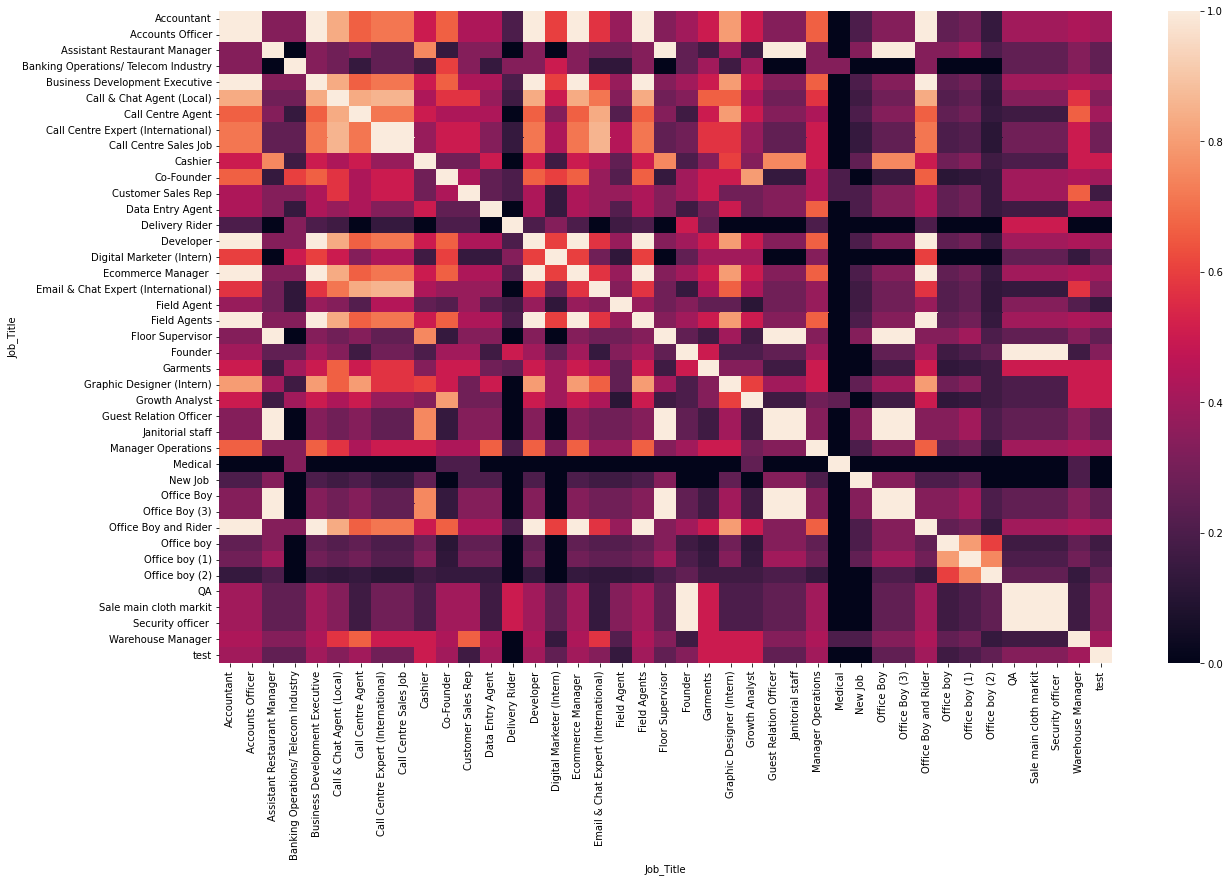

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(jaccard_similarity_df)

# Model 4

In [ ]:
project_id = '789456123'
Applicant_description = pd.io.gbq.read_gbq(f"""
SELECT
Job_Title,
Job_Description
FROM
`powerful-surf-340313.Jobs.applicants`
""", project_id=project_id)

Applicant_description=Applicant_description[['Job_Title','Job_Description']]
Applicant_description.drop_duplicates(subset=['Job_Title','Job_Description'],inplace=True,keep='last')

In [ ]:
Applicant_description.head()

,Job_Title,Job_Description
0,Driver,legally work in the country
6,Waiter,We are looking for the services of Waiter
7,Waiter,We are looking for the services of the ` Waiter `
9,Inventory Associate,"Inventory Associate,�keeps track of the goods ..."
10,Delivery Associate,A delivery associate is�responsible for pickin...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object and transform the plot column
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)

In [ ]:
Applicant_description=Applicant_description.dropna()

In [ ]:
vectorized_data = vectorizer.fit_transform(Applicant_description['Job_Description'])


In [ ]:
vectorizer.get_feature_names()

In [ ]:
tfidf=pd.DataFrame(vectorized_data.toarray(),columns=vectorizer.get_feature_names())
tfidf.index=Applicant_description['Job_Title']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf


In [ ]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf)


In [ ]:

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=Applicant_description['Job_Title'], columns=Applicant_description['Job_Title'])

# Print the top 5 rows of the DataFrame
print(cosine_similarity_df.head())

Job_Title              Driver  ...  Call Centre Sales Job
Job_Title                      ...                       
Driver               1.000000  ...               0.017130
Waiter               0.111655  ...               0.129252
Waiter               0.211892  ...               0.122643
Inventory Associate  0.115282  ...               0.134827
Delivery Associate   0.041149  ...               0.035507

[5 rows x 104 columns]


In [ ]:
cosine_similarity_df

Job_Title,Driver,Waiter,Waiter,Inventory Associate,Delivery Associate,Delivery Associate,Picker/Packer Officer,Inventory Associate,Cashier,System Operator (Odoo),Fleet Associate,Data Entry Officer,Accountant,Field Agent,Data Entry,Accounts Officer,Welder,Call Centre Staff,Tele-Sales Agents,Accounts & Distribution Manager,PITC,Website designer,Area manager internet service providers company,PITC,Airlift Express As A Rider,Customer Support Representative,Accounts & Distribution Manager,Co-Founder,Developer,Banking Operations/ Telecom Industry,Accountant,Security officer,Co-Founder,Delivery Rider,SALES MAN CASHIER,Co-Founder,Accountant,Sales Officer,As Monitoring officer At K&N'S Pakistan,"Customer Services Manager, Area Sales Manager, Customer Care Manager",...,Export Manager,Airlift Express As A Rider,Customer Support Representative,CNC technician and supervisor,Team Leader,Accounts & Distribution Manager,Accountant,Office Boy,Office Boy (3),Janitorial staff,test,New Job,Office boy (2),Office boy,Office boy (1),Digital Marketer (Intern),Field Agent,Data Entry,Accounts Officer,Ecommerce Manager,Manager Operations,Warehouse Manager,Field Agents,Assistant Restaurant Manager,Cashier,Cashier,Floor Supervisor,Guest Relation Officer,Office Boy and Rider,Accounts Officer,Business Development Executive,Accountant,Customer Sales Rep,Graphic Designer (Intern),Data Entry Agent,Call & Chat Agent (Local),Call Centre Expert (International),Email & Chat Expert (International),Call Centre Agent,Call Centre Sales Job
Job_Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Driver,1.000000,0.111655,0.211892,0.115282,0.041149,0.041149,0.082067,0.115282,0.000000,0.046007,0.195124,0.042156,0.061690,0.130269,0.073117,0.187472,0.000000,0.000000,0.000000,0.061690,0.130269,0.130269,0.130269,0.258141,0.190462,0.190462,0.190462,0.190462,0.190462,0.190462,0.115798,0.115798,0.115798,0.115798,0.135706,0.135706,0.135706,0.135706,0.135706,0.135706,...,0.135613,0.135613,0.135613,0.135613,0.135613,0.135613,0.135613,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.126974,0.258141,0.190462,0.115798,0.135706,0.110860,0.0,0.000000,0.000000,0.118480,0.000000,0.064435,0.041891,0.000000,0.111689,0.051807,0.000000,0.000000,0.000000,0.162096,0.097495,0.129763,0.164608,0.017130
Waiter,0.111655,1.000000,0.983873,0.077939,0.036469,0.036469,0.018025,0.077939,0.000000,0.000000,0.173071,0.053549,0.033937,0.025793,0.106920,0.053623,0.000000,0.000000,0.013230,0.033937,0.025793,0.025793,0.025793,0.000000,0.032769,0.032769,0.032769,0.032769,0.032769,0.032769,0.066920,0.066920,0.066920,0.066920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057943,0.057943,0.057943,0.057943,0.057943,0.057943,0.057943,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.099082,0.061862,0.000000,0.032769,0.066920,0.000000,0.000000,0.0,0.000000,0.000000,0.065178,0.000000,0.000000,0.026151,0.017197,0.100172,0.055662,0.030022,0.099082,0.027312,0.111484,0.107127,0.132022,0.113212,0.129252
Waiter,0.211892,0.983873,1.000000,0.101041,0.047506,0.047506,0.017103,0.101041,0.000000,0.000000,0.214247,0.050811,0.043792,0.048949,0.101453,0.086102,0.000000,0.000000,0.012553,0.043792,0.048949,0.048949,0.048949,0.000000,0.047552,0.047552,0.047552,0.047552,0.047552,0.047552,0.090706,0.090706,0.090706,0.090706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.075237,0.075237,0.075237,0.075237,0.075237,0.075237,0.075237,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.094015,0.069671,0.000000,0.047552,0.090706,0.000000,0.000000,0.0,0.000000,0.000000,0.084105,0.000000,0.000000,0.037949,0.016317,0.130069,0.052815,0.028487,0.094015,0.025916,0.139096,0.119966,0.155760,0.141252,0.122643
Inventory Associate,0.115282,0.077939,0.101041,1.000000,0.052083,0.052083,0.249907,1.000000,0.047820,0.015331,0.143967,0.058299,0.073487,0.085676,0.022507,0.071566,0.021060,0.000000,0.065712,0.073487,0.085676,0.085676,0.085676,0.004861,0.05

# Model NO 4
